和回归问题类似，分类问题不同的地方是预测的值仅限于少量的几个离散的值。我们首先关注二值分类问题，这时预测的值仅限于0和1。比如，我们可以建立一个垃圾邮件分类器，此时$x^{(i)}$是一封邮件的某些特征，y为1表示其为垃圾邮件，否则表示不是垃圾邮件。0也被称为负类，1称为正类。$y^{(i)}$ 也被称为样本i的标记（label）。

## Logistic函数
如果我们忽略二分类问题中y的取值是一个离散的取值（0或1），我们继续使用线性回归来预测y的取值。这样做会导致y的取值并不为0或1。逻辑回归使用一个函数来归一化y值，使y的取值在区间(0,1)内，

$$
h(\theta)=g(\theta^Tx)=\frac{1}{1+e^{-\theta x}}
$$
这个函数称为Logistic函数(logistic function)，也称为Sigmoid函数(sigmoid function)。函数公式如下：
$$
g(z) = \frac{1}{1+e^{-z}}
$$

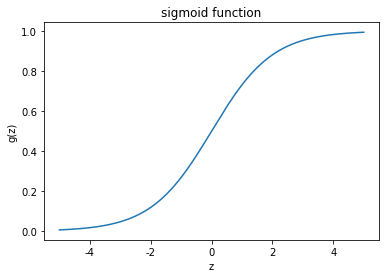

In [1]:
from pylab import *
import random
import matplotlib  as mpl
import matplotlib.pyplot as plt
import numpy as np
 
#myfont = matplotlib.font_manager.FontProperties(fname=r"simkai.ttf")  #fname指定字体文件  选简体显示中文
#第七行的作用是为了消除更换为unicode字体之后0、负数之类的显示异常。之后所有使用中文字体的地方只字符串都以u""的形式出现，并指定fontproperties属性为我们的指定的myfont就行了
mpl.rcParams['axes.unicode_minus'] = False
#mpl.rcParams['font.sans-serif'] = ['SimHei']
t = np.arange(-5, 5, 0.001)
y = 1/(1 + np.power(e, -t))
plt.plot(t, y)
plt.title('sigmoid function')
plt.xlabel(u'z')
plt.ylabel(u'g(z)')
 
plt.show()

Notice that g(z) tends towards 1 as z → ∞, and g(z) tends towards 0 as
z → −∞. Moreover, g(z), and hence also h(x), is always bounded between
0 and 1. As before, we are keeping the convention of letting x0 = 1, so that

$\theta^Tx=\theta _0 +\sum_{j=1}^d θ_jx_j$

For now, let’s take the choice of g as given. Other functions that smoothly
increase from 0 to 1 can also be used, but for a couple of reasons that we’ll see
later (when we talk about GLMs, and when we talk about generative learning
algorithms), the choice of the logistic function is a fairly natural one. Before
moving on, here’s a useful property of the derivative of the sigmoid function,
which we write as g′:

$g'(z)=\frac{d}{dz}(\frac{1}{1+e^{-z}})= \frac{1}{(1+e^{-z})^2}e^{-z}= \frac{1}{1+e^{-z}}(1-\frac{1}{1+e^{-z}})= g(z)(1-g(z)$

Assuming that the n training examples were generated independently, we
can then write down the likelihood of the parameters as


$p(y=1|x;\theta)=h_\theta(x)$


$p(y=0|x;\theta)=1-h_\theta(x)$



$p(y|x;\theta)=h_\theta(x)^y(1-h_\theta(x))^{(1-y)}$


$p(\vec y|X;\theta )=\prod p(y|x;\theta)=\prod h_\theta(x)^y(1-h_\theta(x))^{(1-y)}$

As before, it will be easier to maximize the log likelihood:

$l(\theta)=logL(\theta)=\sum_{i=1}^{m}y^{(i)}logh_\theta(x^{(i)})+(1-y^{(i)})log(1-h_\theta(x^{(i)}))$

$\theta=\theta+\alpha\bigtriangledown _\theta l(\theta)$

$\frac{\partial }{\partial \theta_j}l(\theta)=\sum_{i=1}^{m}(y^{(i)}-h_\theta(x^{(i)}))x_j^{(i)}$

$\frac{\partial }{\partial \theta_j}l(\theta)= (y \frac {1} {g( \theta ^T x)} -(1-y) \frac {1}{1-g(\theta ^Tx)})\frac {\partial} {\partial \theta_j}g(\theta ^T x)$

$= (y \frac {1} {g( \theta ^T x)} -(1-y) \frac {1}{1-g(\theta ^Tx)})g(\theta ^T x)(1-g(\theta ^Tx))\frac {\partial}{\partial \theta_j} \theta ^Tx$

$= (y(1-g(\theta ^Tx))-(1-y)g(\theta ^T x))x_j$

$= (y-h_\theta(x))x_j$


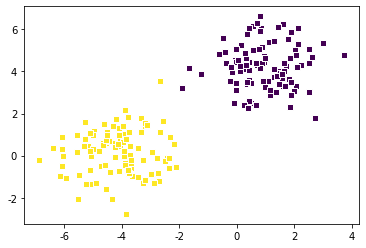

In [2]:
# original method, use numpy to implement
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from math import exp, log
import copy

## Hyper-paramters definition
LR = 0.05
EPOCH = 5
# numpy.random.normal(loc=0.0, scale=1.0, size=None)  
# loc:float 概率分布的均值，对应着整个分布的中心center
# scale:float概率分布的标准差，对应于分布的宽度，scale越大越矮胖，scale越小，越瘦高
# size:int or tuple of ints
# 我们更经常会用到np.random.randn(size)所谓标准正太分布（μ=0, σ=1），对应于np.random.normal(loc=0, scale=1, size)
THETA = np.random.normal(0, 0.1, 3).reshape(3, 1) # learnable parameters
# https://www.jianshu.com/p/069d8841bd8e make_blobs函数是为聚类产生数据集
X, Y = make_blobs(n_samples=300, centers=2, n_features=2, random_state=3)
# plt.scatter(X[:, 0], X[:, 1], c=Y)
# plt.show()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
plt.scatter(X_train[:,0], X_train[:, 1], c=Y_train, edgecolors='white', marker='s')
plt.show()

X0_train = np.ones([X_train.shape[0],1],dtype=X_train.dtype)
X0_test = np.ones([X_test.shape[0],1], dtype=X_test.dtype)
X_train_original = copy.deepcopy(X_train)
X_train = np.concatenate((X0_train,X_train), axis=1)
X_test = np.concatenate((X0_test, X_test), axis=1)

THETA [[-0.02775545]
 [-1.56463257]
 [-1.06672489]]


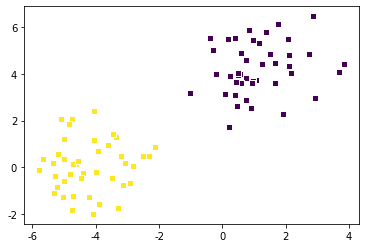

In [3]:
def linear_h(theta, x):
    #print(x)
    h_x = np.matmul(theta.T,x.T)
    return h_x

def sigmoid(x):
    h_x = linear_h(THETA,x)
    g = 1/(1 + exp(-h_x))
    return g

def loss_function(sample):
    x,y = sample[0], sample[1]
    p = sigmoid(x)
    loss = -y*log(p)-(1-y)*log(1-p)
    return loss

def gradient(sample):
    x,y = sample[0], sample[1]
    h = sigmoid(x)
    return (h-y)*x

def update_parameters(theta, gradient, lr):
    theta = theta-lr*gradient
    return theta

for ep in range(EPOCH):
    for index in range(X_train.shape[0]//2):
        batch_X = X_train[index*2:(index+1)*2,:] # 2*2 matrix
        batch_Y = Y_train[index*2:(index+1)*2]# 2*1 matrix
        #print(batch_X)
        h_X = [sigmoid(x) for x in batch_X]
        loss = [ loss_function((x,y)) for (x,y) in zip(batch_X, batch_Y)]
        g = [gradient((x,y)) for (x,y) in zip(batch_X, batch_Y)]
        g = np.array(g).mean(axis=0)
#         print(g)
        g = g.reshape([3,1])
        THETA = update_parameters(THETA, g, LR)
#         print("[{0}/{1}, Stpes:{2}, loss: {3}, Weight: {4}, Bias:{5}]".format( \
#                   ep+1, EPOCH, index+1, loss[0],THETA[1,0],THETA[0,0]))

i = 0
print('THETA', THETA)
H_test = np.zeros([Y_test.shape[0], 1], dtype=Y_test.dtype)
for x, y in zip(X_test, Y_test):
    H_test[i,0] = np.around(sigmoid(x))
    i+=1
plt.figure(1)
x = np.linspace(-7, 4, 50)
plt.scatter(X_test[:, 1], X_test[:, 2], c=H_test[:, 0], edgecolors='white', marker='s')
plt.show()

In [4]:
import torch
import torch.nn as nn

class LogisticRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LogisticRegression,self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

model = LogisticRegression(2,1)
model = model.double()
# BCELoss与CrossEntropyLoss都是用于分类问题。可以知道，BCELoss是
# Binary CrossEntropyLoss的缩写，BCELoss是CrossEntropyLoss的一个特例，
# 只用于二分类问题，而CrossEntropyLoss可以用于二分类，也可以用于多分类。
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.02)
num_epoches = 3
for epoch in range(num_epoches):
    for index in range(X_train_original.shape[0]//2):
        batch_X = X_train_original[index*2:(index+1)*2,:]
        batch_Y = Y_train[index*2:(index+1)*2].reshape([2,1])
        inputs = torch.from_numpy(batch_X)
        targets = torch.from_numpy(batch_Y).double()
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs,targets)
        loss.backward()
        optimizer.step()
    if (epoch+1) % 5 == 0:
      print ('Epoch [%d/%d], Loss: %.4f' 
           %(epoch+1, num_epochs, loss.data[0]))

i=0
H_test = np.zeros([Y_test.shape[0], 1], dtype=Y_test.dtype)
for x, y in zip(X_test, Y_test):
    H_test[i,0] = np.around(sigmoid(x))
    i+=1
plt.figure(1)
x = np.linspace(-7, 4, 50)
plt.scatter(X_test[:, 1], X_test[:, 2], c=H_test[:, 0], edgecolors='white', marker='s')
plt.show()


ModuleNotFoundError: No module named 'torch'